<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './sacramento_real_estate_transactions.csv'

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

estate = pd.read_csv(sac_csv, index_col='sale_date', parse_dates=True)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [30]:
# A:

estate.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
price        0
latitude     0
longitude    0
dtype: int64

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [56]:
estate.head()


,street,city,zip,state,beds,baths,sq__ft,type,price,latitude,longitude
sale_date,,,,,,,,,,,
2008-05-21,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,59222,38.631913,-121.434879
2008-05-21,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,68212,38.478902,-121.431028
2008-05-21,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,68880,38.618305,-121.443839
2008-05-21,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,69307,38.616835,-121.439146
2008-05-21,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,81900,38.519470,-121.435768


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(985, 1)
(985,)


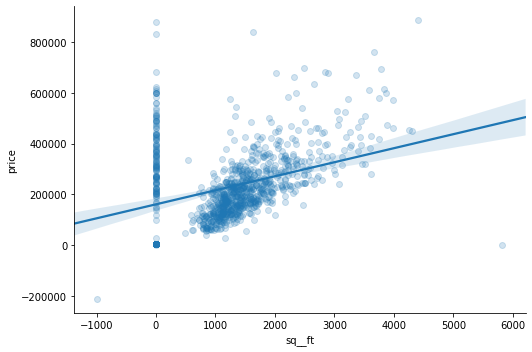

In [59]:
# A

sns.lmplot(x='sq__ft', y='price', data=estate, aspect=1.5, scatter_kws={'alpha':0.2});

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [60]:
# A:

estate.corrwith(estate.price)

zip         -0.095918
beds         0.344752
baths        0.416718
sq__ft       0.339628
price        1.000000
latitude     0.100806
longitude   -0.094262
dtype: float64

In [ ]:
estate.plot(x="sq__ft", y="price",)

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [61]:
# A:

from sklearn.linear_model import LinearRegression

x = estate[["sq__ft"]]
y = estate.price
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6. Interpret the intercept. Interpret the slope.

In [62]:
# A:
lr.coef_

array([55.17721241])

In [63]:
lr.intercept_

161272.7527792226

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [66]:
# A:

prediction = lr.predict(x)
residual = (y - prediction) ** 2

In [67]:
residual.mean()

17096849475.079935